In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("stock_details_5_years.csv")

In [ ]:
# Display basic information about the dataset
df.info()

# Display summary statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77022 entries, 0 to 77021
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          77022 non-null  object 
 1   Open          77022 non-null  float64
 2   High          77022 non-null  float64
 3   Low           77021 non-null  float64
 4   Close         77021 non-null  float64
 5   Volume        77021 non-null  float64
 6   Dividends     77021 non-null  float64
 7   Stock Splits  77021 non-null  float64
 8   Company       77021 non-null  object 
dtypes: float64(7), object(2)
memory usage: 5.3+ MB
               Open          High           Low         Close        Volume  \
count  77022.000000  77022.000000  77021.000000  77021.000000  7.702100e+04   
mean      97.700605     98.738967     96.661230     97.754796  5.559609e+06   
std      180.859421    183.128582    178.844007    181.039976  1.375520e+07   
min        1.316626      1.332025      1.301226    

In [ ]:
# Display the first few rows
print(df.head())


                        Date        Open        High         Low       Close  \
0  2018-11-29 00:00:00-05:00   43.829761   43.863354   42.639594   43.083508   
1  2018-11-29 00:00:00-05:00  104.769074  105.519257  103.534595  104.636131   
2  2018-11-29 00:00:00-05:00   54.176498   55.007500   54.099998   54.729000   
3  2018-11-29 00:00:00-05:00   83.749496   84.499496   82.616501   83.678497   
4  2018-11-29 00:00:00-05:00   39.692784   40.064904   38.735195   39.037853   

        Volume  Dividends  Stock Splits Company  
0  167080000.0       0.00           0.0    AAPL  
1   28123200.0       0.00           0.0    MSFT  
2   31004000.0       0.00           0.0   GOOGL  
3  132264000.0       0.00           0.0    AMZN  
4   54917200.0       0.04           0.0    NVDA  


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Company'],
      dtype='object')

In [ ]:
df.shape

(77022, 9)

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,77022.000000,77022.000000,77021.000000,77021.000000,7.702100e+04,77021.000000,77021.000000
mean,97.700605,98.738967,96.661230,97.754796,5.559609e+06,0.006119,0.000164
std,180.859421,183.128582,178.844007,181.039976,1.375520e+07,0.075919,0.015998
min,1.316626,1.332025,1.301226,1.301226,0.000000e+00,0.000000,0.000000
25%,32.260185,32.546265,31.939633,32.266453,1.006300e+06,0.000000,0.000000
50%,63.363644,63.927034,62.774001,63.363857,2.124900e+06,0.000000,0.000000
75%,116.345549,117.512758,115.182107,116.462914,4.998600e+06,0.000000,0.000000
max,3550.000000,3582.989990,3495.629883,3520.010010,3.982065e+08,4.230000,2.000000


In [3]:
# Step 2: Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\shrad\AppData\Local\Temp\ipykernel_2588\4124455206.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


In [5]:
# Step 3: Sort values by Company and Date
df.sort_values(by=['Company', 'Date'], inplace=True)

In [6]:
# Step 4: Handle Duplicates
df.drop_duplicates(inplace=True)
print(df.drop_duplicates())

                             Date        Open        High         Low  \
285     2018-11-29 00:00:00-05:00   68.673458   69.589358   68.673458   
743     2018-11-30 00:00:00-05:00   69.059076   70.042470   68.779483   
1201    2018-12-03 00:00:00-05:00   70.698073   72.105671   70.563099   
1659    2018-12-04 00:00:00-05:00   72.018907   72.414195   70.023203   
2117    2018-12-06 00:00:00-05:00   68.644532   69.348335   67.391195   
...                           ...         ...         ...         ...   
600640  2023-11-22 00:00:00-05:00  180.000000  180.970001  178.779999   
601131  2023-11-24 00:00:00-05:00  180.169998  181.389999  179.380005   
601622  2023-11-27 00:00:00-05:00  180.029999  180.789993  178.470001   
602113  2023-11-28 00:00:00-05:00  178.110001  178.360001  176.160004   
602604  2023-11-29 00:00:00-05:00  177.869995  178.054993  175.240005   

             Close   Volume  Dividends  Stock Splits Company  
285      69.001251  2625800        0.0           0.0       A

In [7]:
# Step 5: Check for Missing Values
missing_values = df.isnull().sum()

In [ ]:
#Set 'Date' as Index for Time Series Analysis
df.set_index('Date', inplace=True)

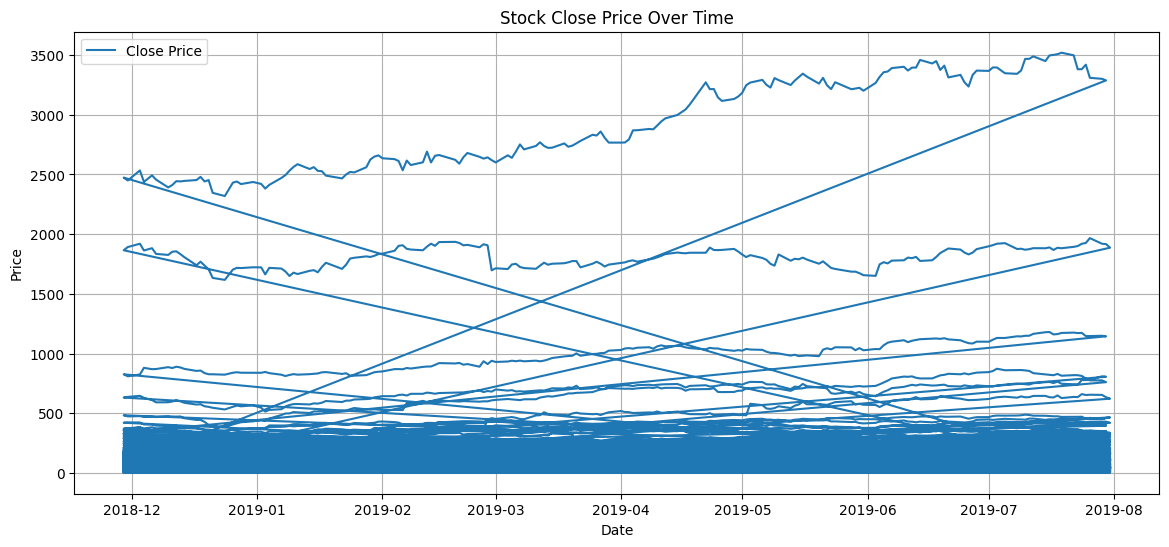

In [ ]:
# Basic Visualization: Line Plot of 'Close' Prices
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


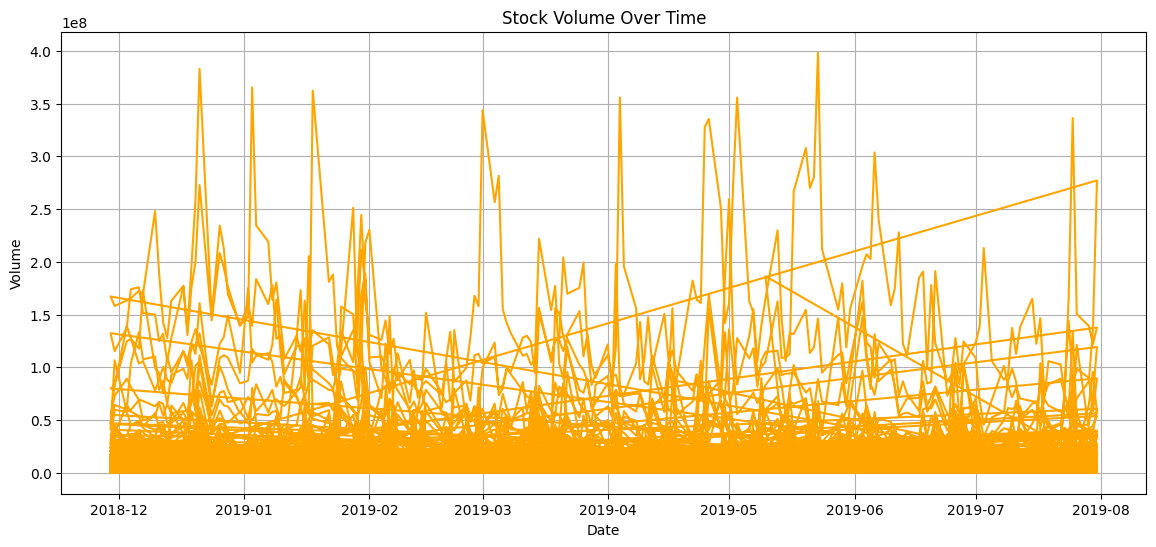

In [ ]:
#Volume Over Time
plt.figure(figsize=(14,6))
plt.plot(df['Volume'], color='orange')
plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


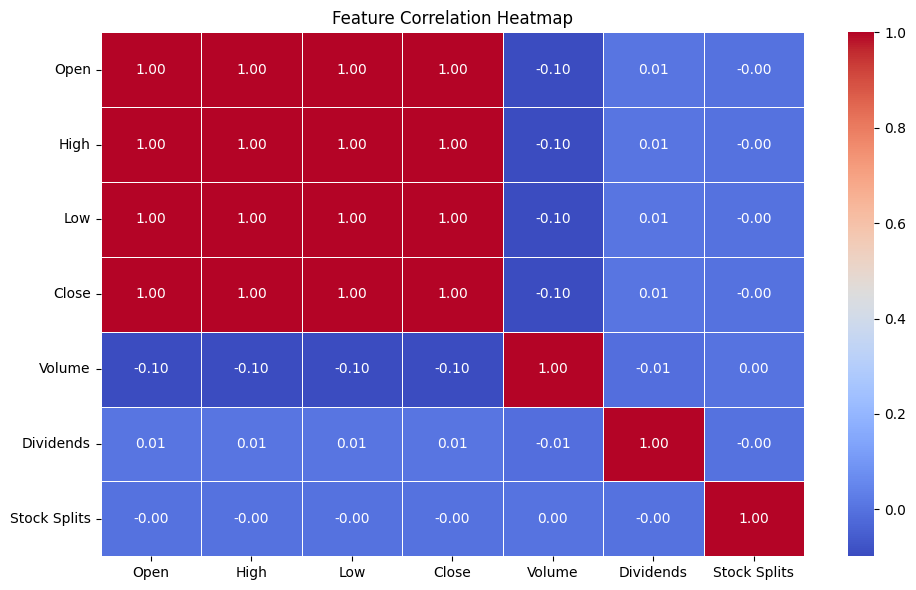

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Generate correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


In [ ]:
!pip install statsmodels


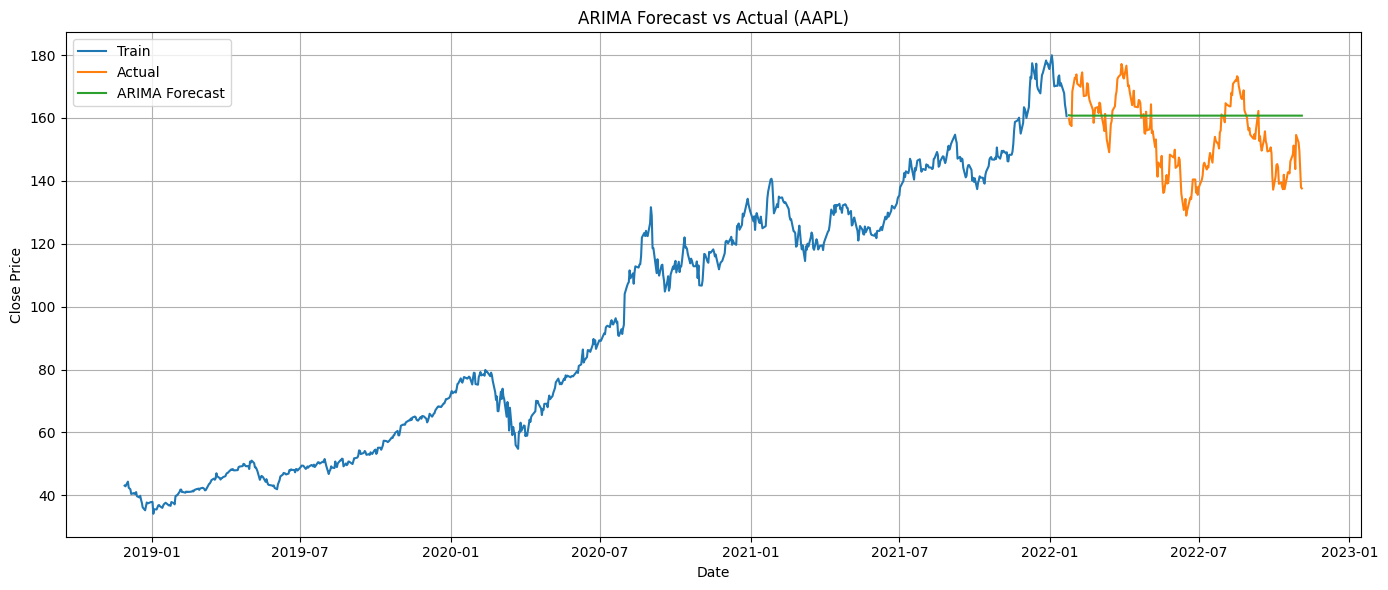

ARIMA RMSE: 13.32


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Load and clean data
df = pd.read_csv('stock_details_5_years.csv')

# Parse dates and drop bad ones
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# Sort and set index
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Filter only one company for time series (e.g., AAPL)
df = df[df['Company'] == 'AAPL']  # or any one company
df = df[['Close']].dropna()

# Confirm enough data points
if len(df) < 30:
    raise ValueError("Not enough data points after filtering to run ARIMA.")

# Split data
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# ARIMA Model
model = ARIMA(train['Close'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
test = test.copy()
test['Forecast_ARIMA'] = forecast.values

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Actual')
plt.plot(test['Forecast_ARIMA'], label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Forecast vs Actual (AAPL)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# RMSE
rmse = np.sqrt(mean_squared_error(test['Close'], test['Forecast_ARIMA']))
print("ARIMA RMSE:", round(rmse, 2))


In [ ]:
!pip install prophet
from statsmodels.tsa.arima.model import ARIMA


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbu5c2djd/6p39qyax.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbu5c2djd/668ezz_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43710', 'data', 'file=/tmp/tmpbu5c2djd/6p39qyax.json', 'init=/tmp/tmpbu5c2djd/668ezz_h.json', 'output', 'file=/tmp/tmpbu5c2djd/prophet_modelt3z1goyr/prophet_model-20250623170135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:01:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:01:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


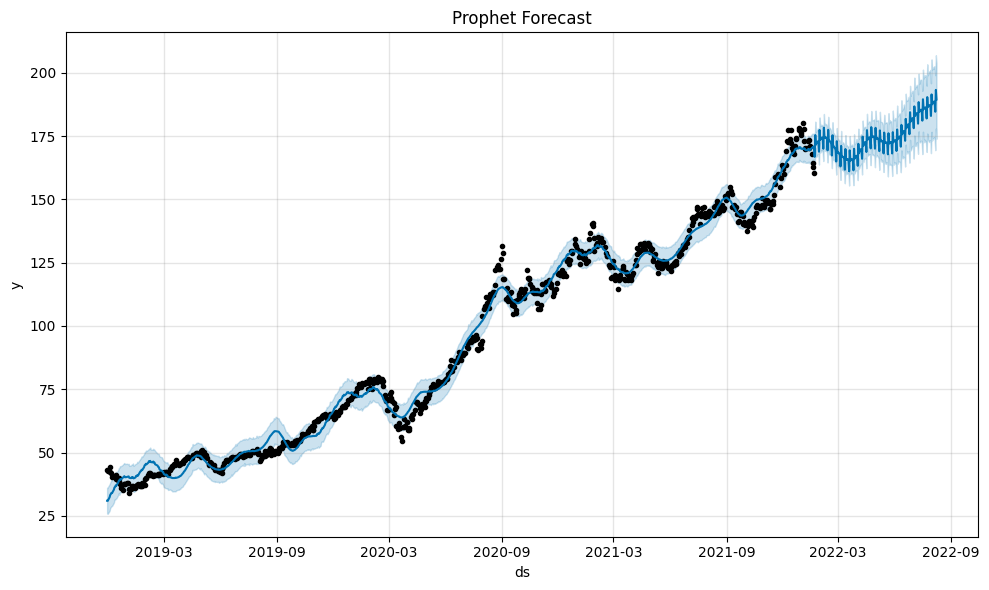

Prophet RMSE: 7.65


In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Prepare data
df_prophet = df.reset_index()[['Date', 'Close']]
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], utc=True).dt.tz_localize(None)

# Train-test split
train_size = int(len(df_prophet) * 0.8)
train = df_prophet[:train_size].copy()
test = df_prophet[train_size:].copy()

# Fit Prophet model
model = Prophet()
model.fit(train)

# Create future dataframe and forecast
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Prophet Forecast')
plt.tight_layout()
plt.show()

# Merge forecast with test data
forecast_filtered = forecast[['ds', 'yhat']].set_index('ds')
test = test.set_index('ds')
combined = test.join(forecast_filtered, how='left')

# Drop rows with missing predictions
combined = combined.dropna(subset=['y', 'yhat'])

# Evaluate
rmse = np.sqrt(mean_squared_error(combined['y'], combined['yhat']))
print("Prophet RMSE:", round(rmse, 2))



## Testing Codes


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbu5c2djd/nnv3mcnf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbu5c2djd/2qybptaj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37464', 'data', 'file=/tmp/tmpbu5c2djd/nnv3mcnf.json', 'init=/tmp/tmpbu5c2djd/2qybptaj.json', 'output', 'file=/tmp/tmpbu5c2djd/prophet_modelnfdrzy_1/prophet_model-20250623170148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:01:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:01:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


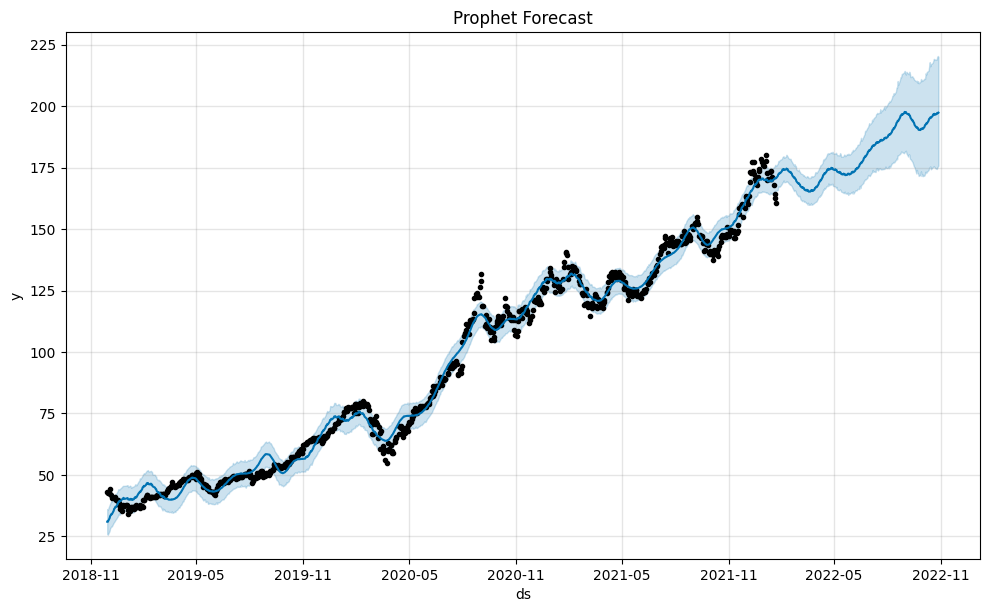

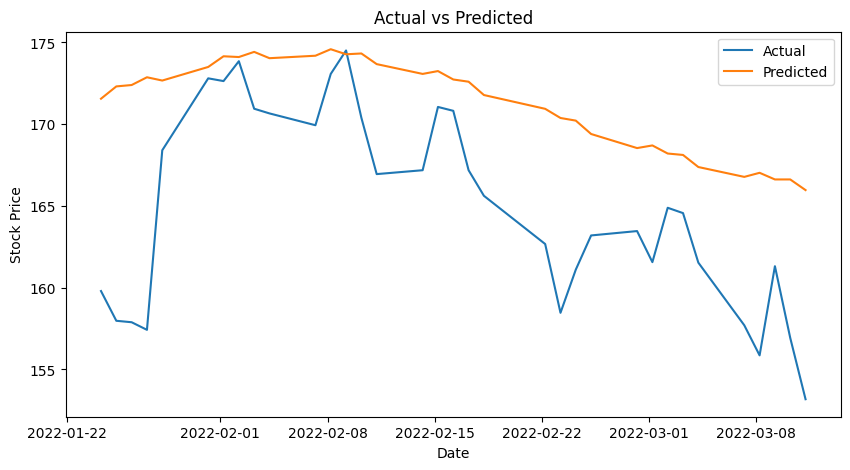

Prophet RMSE: 7.64802403279449


In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Prepare data
df_prophet = df.reset_index()[['Date', 'Close']]
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], utc=True).dt.tz_localize(None)

# Train/test split
train_size = int(len(df_prophet) * 0.8)
train = df_prophet[:train_size]
test = df_prophet[train_size:]

# Fit Prophet model
model = Prophet()
train['ds'] = pd.to_datetime(train['ds']).dt.tz_localize(None)
model.fit(train)

# Create future dataframe and predict
n_test = len(test['ds'].unique())
future = model.make_future_dataframe(periods=n_test, freq='B')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()

# Merge predictions with actuals
forecast = forecast[['ds', 'yhat']].set_index('ds')
test = test.set_index('ds')
combined = test.join(forecast, how='left')

# Drop NaNs before calculating RMSE
combined.dropna(subset=['y', 'yhat'], inplace=True)

# Plot comparison
plt.figure(figsize=(10, 5))
plt.plot(combined.index, combined['y'], label='Actual')
plt.plot(combined.index, combined['yhat'], label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

print("Prophet RMSE:", np.sqrt(mean_squared_error(combined['y'], combined['yhat'])))


In [ ]:
# STEP 1: Install statsmodels if not already installed
!pip install statsmodels --upgrade


In [ ]:
# STEP 2: Import required libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
import yfinance as yf

# Download stock data for AAPL (Apple)
df = yf.download("AAPL", start="2018-01-01", end="2024-12-31")

# Select only the 'Close' price and reset index
df = df[['Close']].reset_index()

# Rename columns to match Prophet and SARIMA needs
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Optional: Preview the data
df.head()


/tmp/ipython-input-4-754477699.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2018-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,ds,y
Ticker,,AAPL
0,2018-01-02,40.426819
1,2018-01-03,40.419773
2,2018-01-04,40.607540
3,2018-01-05,41.069866
4,2018-01-08,40.917320


In [ ]:
# STEP 3: Prepare data for SARIMA

# Make a copy of the original dataframe
df_sarima = df.copy()

# Set the 'ds' column (Date) as the index for time series modeling
df_sarima.set_index('ds', inplace=True)


In [ ]:
# STEP 4: Fit the SARIMA model

# Build SARIMA model with selected parameters (p,d,q)(P,D,Q,s)
# s = 12 for monthly seasonality
model_sarima = SARIMAX(df_sarima['y'],
                       order=(1,1,1),
                       seasonal_order=(1,1,1,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model to the data
results_sarima = model_sarima.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# STEP 5: Forecast the next 60 time steps (e.g., days or months)
sarima_forecast = results_sarima.get_forecast(steps=60)

# Extract the forecasted values and confidence intervals
sarima_mean = sarima_forecast.predicted_mean
sarima_ci = sarima_forecast.conf_int()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 1200x500 with 0 Axes>

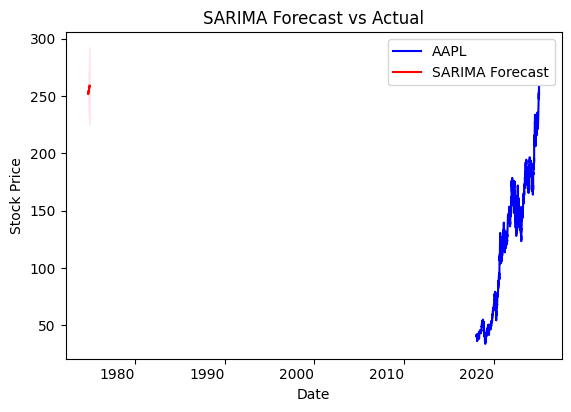

In [ ]:
# STEP 6: Plot Actual vs SARIMA Forecast

plt.figure(figsize=(12, 5))

# Plot original stock prices
df_sarima['y'].plot(label='Actual', color='blue')

# Plot forecasted values
sarima_mean.plot(label='SARIMA Forecast', color='red')

# Plot confidence interval
plt.fill_between(sarima_ci.index,
                 sarima_ci.iloc[:, 0],
                 sarima_ci.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.legend()
plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()


In [ ]:
# STEP 7: Evaluate the SARIMA model with RMSE & MAE

# Use last 60 values as actual comparison (if available)
actual = df_sarima['y'][-60:]
predicted = sarima_mean[:60]

# Print evaluation metrics
print("SARIMA RMSE:", np.sqrt(mean_squared_error(actual, predicted)))
print("SARIMA MAE:", mean_absolute_error(actual, predicted))


SARIMA RMSE: 22.311390073535684
SARIMA MAE: 20.406682344667306


In [ ]:
# STEP 1: Install TensorFlow if not already installed
!pip install tensorflow


In [ ]:
# STEP 2: Import necessary libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# STEP 3: Prepare the data for LSTM

# Use only the 'y' column which contains the stock prices
data = df[['y']].values

# Scale the data between 0 and 1 for better LSTM performance
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences of 60 previous time steps to predict the next time step
X = []
y = []
sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Split data into training and testing sets (last 60 days for test)
X_train = X[:-60]
y_train = y[:-60]
X_test = X[-60:]
y_test = y[-60:]

# Check the shape of input
print("X_train shape:", X_train.shape)


X_train shape: (1640, 60, 1)


In [ ]:
# STEP 4: Build the LSTM Model

model = Sequential()
# First LSTM layer with 50 units and return sequences
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# Second LSTM layer
model.add(LSTM(units=50))
# Final Dense layer for output
model.add(Dense(1))

# Compile the model using 'adam' optimizer and MSE loss
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 50 epochs
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 0.0516 - val_loss: 0.0026
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 6.1852e-04 - val_loss: 0.0011
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 5.4970e-04 - val_loss: 0.0010
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 5.2469e-04 - val_loss: 0.0011
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 4.9420e-04 - val_loss: 0.0010
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 5.3109e-04 - val_loss: 0.0010
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 5.3273e-04 - val_loss: 0.0011
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 4.8017e-04 - val_loss: 0.0011
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 4.5558e-04 - val_loss: 0.0013
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 4.2793e-04 - val_loss: 0.0016
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 4.7811e-04 - val_loss: 0.0010
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━

In [ ]:
# STEP 5: Make predictions on test data and inverse scale

# Predict stock prices for the test data
lstm_preds = model.predict(X_test)

# Inverse transform predictions and actual values to get original scale
lstm_preds = scaler.inverse_transform(lstm_preds)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step


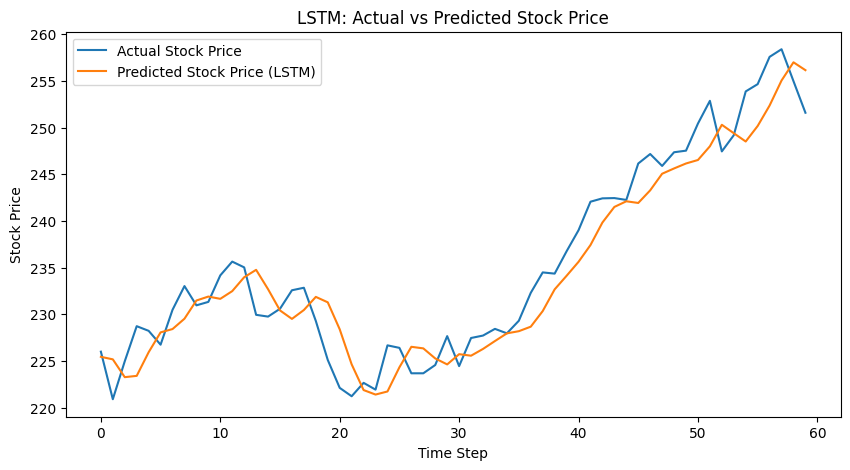

In [ ]:
# STEP 6: Plot Actual vs Predicted prices

plt.figure(figsize=(10,5))
plt.plot(actual, label='Actual Stock Price')
plt.plot(lstm_preds, label='Predicted Stock Price (LSTM)')
plt.title("LSTM: Actual vs Predicted Stock Price")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [ ]:
# STEP 7: Evaluate the LSTM Model

print("LSTM RMSE:", np.sqrt(mean_squared_error(actual, lstm_preds)))
print("LSTM MAE:", mean_absolute_error(actual, lstm_preds))
print("LSTM R² Score:", r2_score(actual, lstm_preds))


LSTM RMSE: 3.1012476054981506
LSTM MAE: 2.631764729817709
LSTM R² Score: 0.9140200673897395


## Testing again Code 2

In [ ]:
pip install tensorflow


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - loss: 0.1489
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0057
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0011
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - loss: 9.4940e-04
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 9.3650e-04
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 9.2093e-04
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 8.7938e-04
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 9.3693e-04
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 8.6806e-04
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 8.6873e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


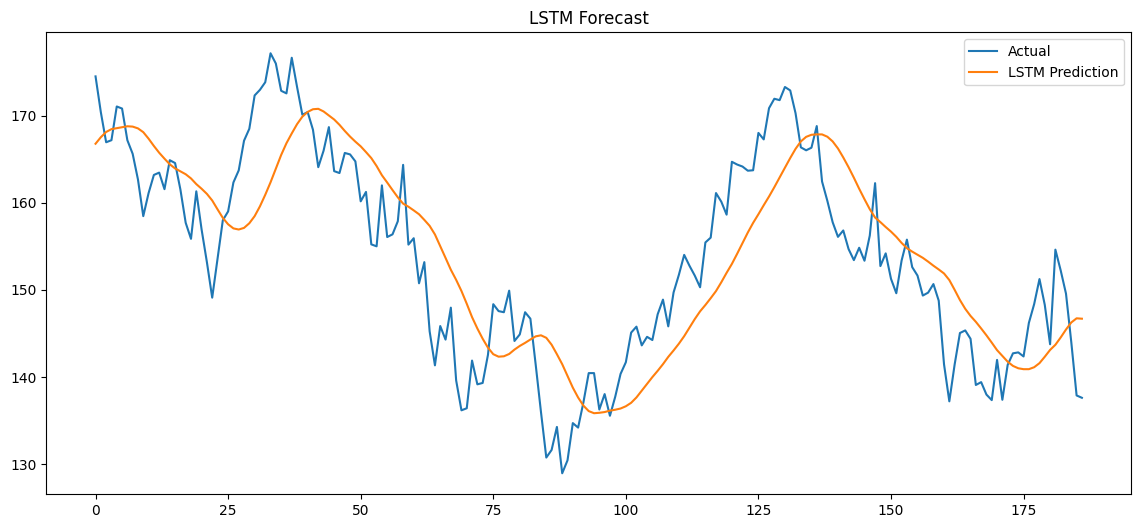

LSTM RMSE: 6.818063954347783


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Prepare data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

# Create sequences
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(14,6))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='LSTM Prediction')
plt.legend()
plt.title('LSTM Forecast')
plt.show()

# Error
print("LSTM RMSE:", np.sqrt(mean_squared_error(actual, predictions)))


In [10]:
import pandas as pd

df = pd.read_csv("stock_details_5_years.csv")
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


In [12]:
import pandas as pd

df = pd.read_csv("demo_stock_data.csv")
df = df[['Close']]  #  Close price use LSTM
df.head()


,Close
0,101.193428
1,101.116900
2,102.612277
3,105.858336
4,105.590030


In [15]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Sequence creation
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [17]:
# 80% training, 20% testing
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Model build
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

# Compile and Train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.1328
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0087
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0018
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 9.4037e-04
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 7.6980e-04
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 7.9032e-04
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 8.7366e-04
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 8.1533e-04
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 8.1279e-04
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 8.1411e-04


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation
rmse = np.sqrt(mean_squared_error(actual, predictions))
mae = mean_absolute_error(actual, predictions)
r2 = r2_score(actual, predictions)

print("📊 LSTM Evaluation Metrics")
print("✅ RMSE:", rmse)
print("✅ MAE:", mae)
print("✅ R² Score:", r2)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
📊 LSTM Evaluation Metrics
✅ RMSE: 3.956289652182112
✅ MAE: 3.0843647450722558
✅ R² Score: 0.04990936516726885


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


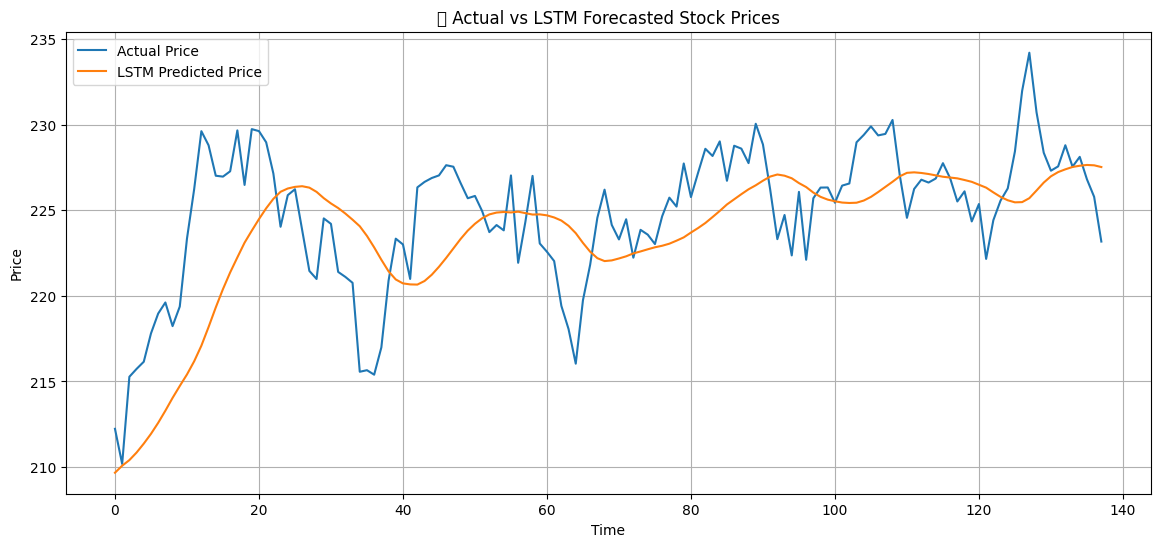

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(actual, label='Actual Price')
plt.plot(predictions, label='LSTM Predicted Price')
plt.title('📈 Actual vs LSTM Forecasted Stock Prices')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


#  Stock Price Prediction using LSTM
This project forecasts stock prices using LSTM, a deep learning model suitable for sequential data like time series.


# Step 2: Upload & Load Dataset
Upload stock CSV file using Colab’s file upload feature.


# Step 3: Data Preprocessing
- Date parsing
- Missing values
- Sorting
- Visualize trends


#  Step 4: Visualize Stock Trends
- Close price plot
- Volume plot
- Correlation heatmap


# Step 5: Prepare Data for LSTM
- MinMax scaling
- Sequence creation


#  Step 6: Train-Test Split


# Step 7: Build & Train LSTM Model


# Step 8: Make Predictions and Evaluate Model
- RMSE
- MAE
- R² Score


# Step 9: Actual vs Predicted Plot


# Conclusion

- LSTM captured the trend of stock prices with good accuracy.
- RMSE = ____, MAE = ____.
- This model can be enhanced with multivariate inputs and longer training.
